In [10]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

s = pd.Series(data=[0,1,2,float('NaN'),4,5])

s.values.mean()

nan

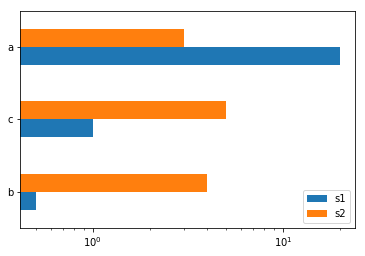

In [31]:
df = pd.DataFrame(data={'s1' : [20,0.5,1],'s2': [3,4,5]},index=['a','b','c'])
df.sort_values(by=['s1'],ascending=True,inplace=True)
fig,ax=plt.subplots()
df.plot.barh(ax=ax)
ax.set_xscale('log')
plt.show()

In [29]:
df.sort_values(by=['s1'],ascending=True,inplace=True)
df

,s1,s2
b,0.5,4
c,1.0,5
a,2.0,3


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

homeDir = 'P:\\PW-WATER SERVICES\\TECHNICAL SERVICES\\Anna'
filename = homeDir + '\\Storm Analysis\\netii_comp.csv'
dfnetII = pd.read_csv(filename,index_col=0)
stormDate = dt.datetime(2019,6,8)
print(dfnetII.dtypes)

2019-06-08             float64
2018-04-23 00:00:00    float64
2018-10-11 00:00:00    float64
2018-11-12 00:00:00    float64
dtype: object


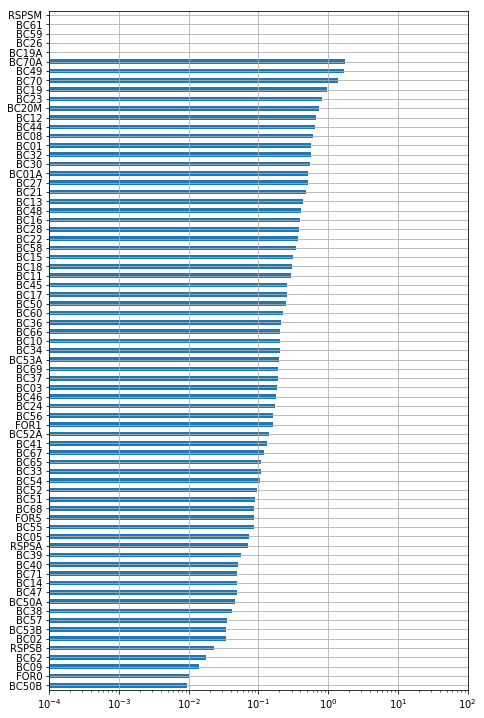

In [71]:
fig, ax = plt.subplots()
dfnetII.sort_values(by=str(stormDate.date()),ascending=True,inplace=True)
dfnetII.loc[:,str(stormDate.date())].plot.barh(figsize=(7.5,12.5),ax=ax)
plt.savefig(homeDir + '\\Storm Analysis\\netii_' + str(stormDate.date()) + '.png')
ax.set_xscale('log')
ax.set_xlim([0.0001,100])
ax.grid()

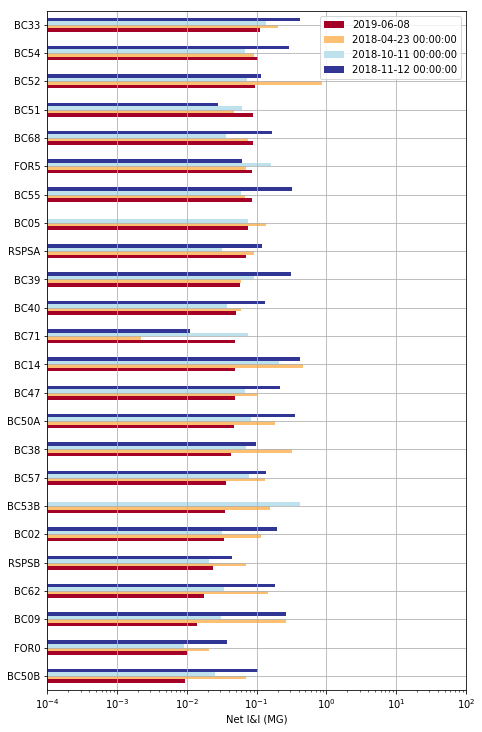

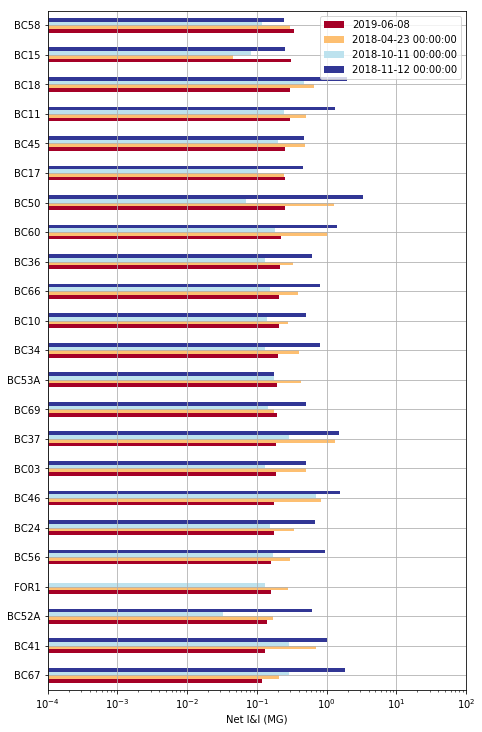

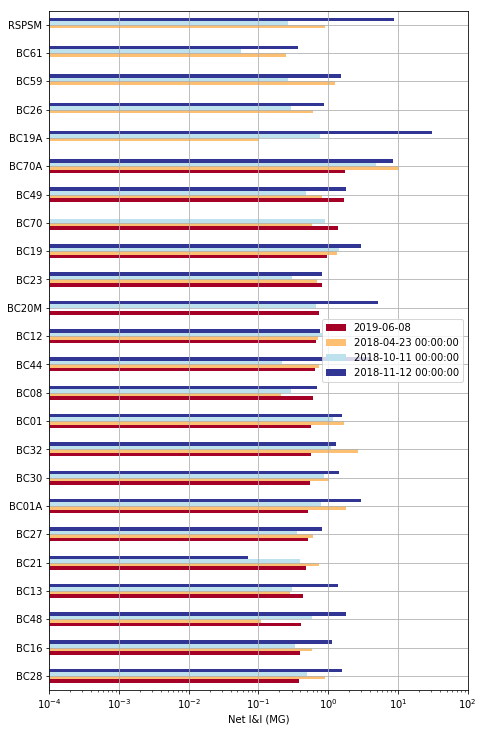

In [70]:
dfnetII.sort_values(by=str(stormDate.date()),ascending=True,inplace=True)
figComp1,axComp1 = plt.subplots()
# SPLIT INTO 3 #
dfnetII.iloc[0:int(len(dfnetII.index)/3),:].plot.barh(figsize=(7.5,12.5),ax=axComp1,colormap='RdYlBu')
axComp1.set_xlabel('Net I&I (MG)')
axComp1.set_xscale('log')
axComp1.set_xlim([0.0001,100])
axComp1.grid()
plt.savefig(homeDir + '\\Storm Analysis\\netii_compLow.png')

figComp2,axComp2 = plt.subplots()
dfnetII.iloc[int(len(dfnetII.index)/3)+1:2*int(len(dfnetII.index)/3),:].plot.barh(figsize=(7.5,12.5),ax=axComp2,colormap='RdYlBu')
axComp2.set_xlabel('Net I&I (MG)')
axComp2.set_xscale('log')
axComp2.set_xlim([0.0001,100])
axComp2.grid()
plt.savefig(homeDir + '\\Storm Analysis\\netii_compMedium.png')

figComp3,axComp3 = plt.subplots()
dfnetII.iloc[2*int(len(dfnetII.index)/3)+1:].plot.barh(figsize=(7.5,12.5),ax=axComp3,colormap='RdYlBu')
axComp3.set_xlabel('Net I&I (MG)')
axComp3.set_xscale('log')
axComp3.set_xlim([0.0001,100])
axComp3.grid()
plt.savefig(homeDir + '\\Storm Analysis\\netii_compHigh.png')

In [145]:
arr = dfnetII.iloc[:,0].values
arr = np.vstack((arr,dfnetII.iloc[:,1].values))
arr = np.vstack((arr,dfnetII.iloc[:,2].values))
arr = np.vstack((arr,dfnetII.iloc[:,3].values))
arr.shape

(4, 73)

In [ ]:
plt.hist2d(x, y, bins=[len(xbase),len(ybase)], normed=False, cmap='plasma')

In [172]:
## heat map
import numpy as np

dfnetII = dfnetII.sort_index()

xspacing =2
yspacing=10
xbase = list(np.linspace(xspacing/2.0,xspacing*len(dfnetII.columns)-xspacing/2.0,len(dfnetII.columns)))
ybase = list(np.linspace(yspacing/2.0,yspacing*len(dfnetII.index)-yspacing/2.0,len(dfnetII.index)))
xbase
x = []
y = []
ii = dfnetII.iloc[:,0].values
for k in range (0,len(xbase)):
    # create positions
    x.extend(xbase[k]*np.ones(len(ybase)))
    y.extend(ybase)
    # create data aray
    if k>0:
        ii = np.hstack((ii,dfnetII.iloc[:,k].values))
x = np.array(x)
y= np.array(y)
# ii = np.reshape(ii,(len(ybase),len(xbase)))

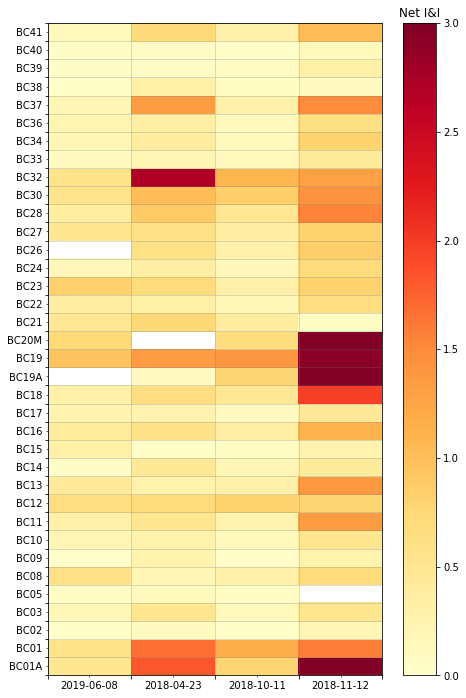

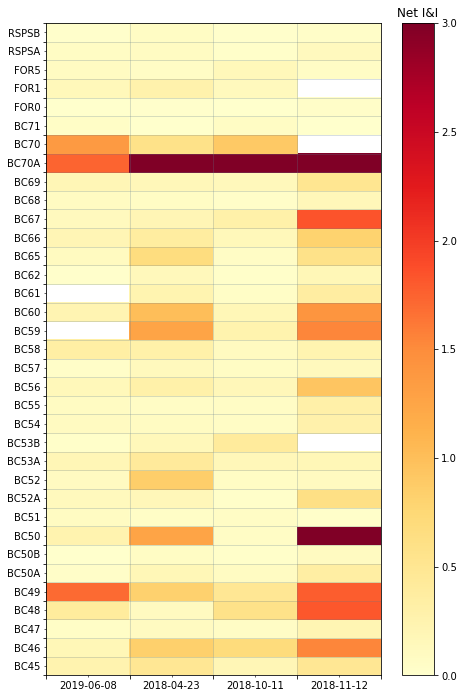

In [4]:
import numpy as np
import matplotlib.ticker as ticker
numsplits = 2
dfnetII.columns = ['2019-06-08','2018-04-23','2018-10-11','2018-11-12']
iSave = []
fms = []
for k in range(0,numsplits):
    if k == 0:
        indStart = 0
        indEnd = int(len(dfnetII)/numsplits)
    else:
        indStart = k*int(len(dfnetII)/numsplits)+1
        indEnd = (k+1)*int(len(dfnetII)/numsplits)
    ii = dfnetII.iloc[indStart:indEnd,0]
    for j in range(0,len(dfnetII.columns)):
        if j>0:
            ii = np.vstack((ii,dfnetII.iloc[indStart:indEnd,j].values))
    iSave.extend([ii])
    fms.extend([list(dfnetII.index[indStart:indEnd])])
    
    # plot for each split
    fig,ax = plt.subplots(figsize=(7.5,12))
    plt.pcolor(ii.T, cmap='YlOrRd',vmin = 0, vmax=3)
    cb = plt.colorbar()
    cb.ax.set_title('Net I&I')
    
    # format axis
    ax.set_xticks(range(0,len(dfnetII.columns)+1))
    ax.set_yticks(range(0,len(fms[k])+1))
    ax.grid(b=True,color='xkcd:blue grey',which='major',linewidth=0.5,
           alpha = 0.5)
    # Hide major tick labels
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    
    ## create labels for storms
    
    
    # Customize minor tick labels
    ax.xaxis.set_minor_locator(ticker.FixedLocator(list(
        np.linspace(0.5,len(dfnetII.columns)-0.5,len(dfnetII.columns)))))
    
    ax.xaxis.set_minor_formatter(ticker.FixedFormatter(list(dfnetII.columns)))

    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_minor_locator(ticker.FixedLocator(list(
        np.linspace(0.5,len(dfnetII.index[indStart:indEnd])-0.5,len(dfnetII.index[indStart:indEnd])))))
    ax.yaxis.set_minor_formatter(ticker.FixedFormatter(list(dfnetII.index[indStart:indEnd])))
    
    saveName = homeDir + '\\Storm Analysis\\' + 'heatmap_' + fms[k][0] + '-' + fms[k][-1]+ '.png'
    plt.savefig(saveName)
    plt.show()
    plt.close(fig)

In [277]:
fms[0][-1]

'BC41'

(4, 73)


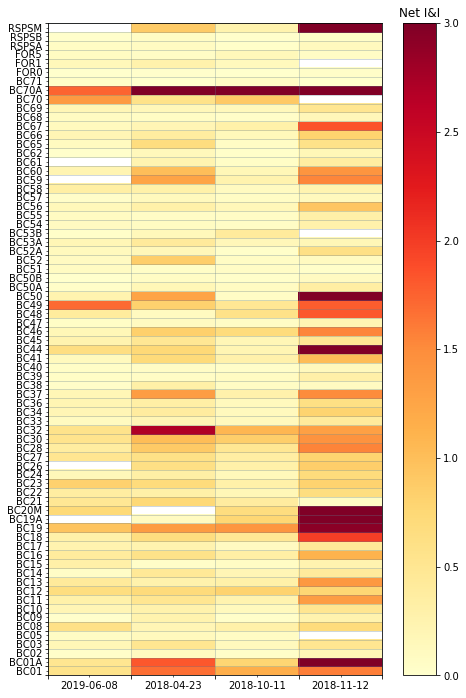

In [284]:
ii = dfnetII.iloc[:,0].values
for k in range (0,len(dfnetII.columns)):
    if k>0:
        ii = np.vstack((ii,dfnetII.iloc[:,k].values))
print(ii.shape)
        
fig,ax = plt.subplots(figsize=(7.5,12))
plt.pcolor(ii.T, cmap='YlOrRd',vmin = 0, vmax=3)
cb = plt.colorbar()
cb.ax.set_title('Net I&I')

############### format axis ###################
ax.set_xticks(range(0,len(df.columns)+1))
ax.set_yticks(range(0,len(df.iloc[:,1])+1))
ax.grid(b=True,color='xkcd:blue grey',which='major',linewidth=0.5,
       alpha = 0.6)

import matplotlib.ticker as ticker
# Hide major tick labels
ax.xaxis.set_major_formatter(ticker.NullFormatter())

# Customize minor tick labels
ax.xaxis.set_minor_locator(ticker.FixedLocator(list(
    np.linspace(0.5,len(dfnetII.columns)-0.5,len(dfnetII.columns)))))
dfnetII.columns = ['2019-06-08','2018-04-23','2018-10-11','2018-11-12']
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(list(dfnetII.columns)))

ax.yaxis.set_major_formatter(ticker.NullFormatter())
ax.yaxis.set_minor_locator(ticker.FixedLocator(list(
    np.linspace(0.5,len(dfnetII.index)-0.5,len(dfnetII.index)))))
ax.yaxis.set_minor_formatter(ticker.FixedFormatter(list(dfnetII.index)))


In [245]:
xlabels = [item.get_text() for item in ax.get_xticklabels()]
dfnetII.columns = ['2019-06-08','2018-04-23','2018-10-11','2018-11-12']
xlabels = list(dfnetII.columns)
xlabels

['2019-06-08', '2018-04-23', '2018-10-11', '2018-11-12']

In [252]:
list(dfnetII.index)

['BC01',
 'BC01A',
 'BC02',
 'BC03',
 'BC05',
 'BC08',
 'BC09',
 'BC10',
 'BC11',
 'BC12',
 'BC13',
 'BC14',
 'BC15',
 'BC16',
 'BC17',
 'BC18',
 'BC19',
 'BC19A',
 'BC20M',
 'BC21',
 'BC22',
 'BC23',
 'BC24',
 'BC26',
 'BC27',
 'BC28',
 'BC30',
 'BC32',
 'BC33',
 'BC34',
 'BC36',
 'BC37',
 'BC38',
 'BC39',
 'BC40',
 'BC41',
 'BC44',
 'BC45',
 'BC46',
 'BC47',
 'BC48',
 'BC49',
 'BC50',
 'BC50A',
 'BC50B',
 'BC51',
 'BC52',
 'BC52A',
 'BC53A',
 'BC53B',
 'BC54',
 'BC55',
 'BC56',
 'BC57',
 'BC58',
 'BC59',
 'BC60',
 'BC61',
 'BC62',
 'BC65',
 'BC66',
 'BC67',
 'BC68',
 'BC69',
 'BC70',
 'BC70A',
 'BC71',
 'FOR0',
 'FOR1',
 'FOR5',
 'RSPSA',
 'RSPSB',
 'RSPSM']